In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [5]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [6]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

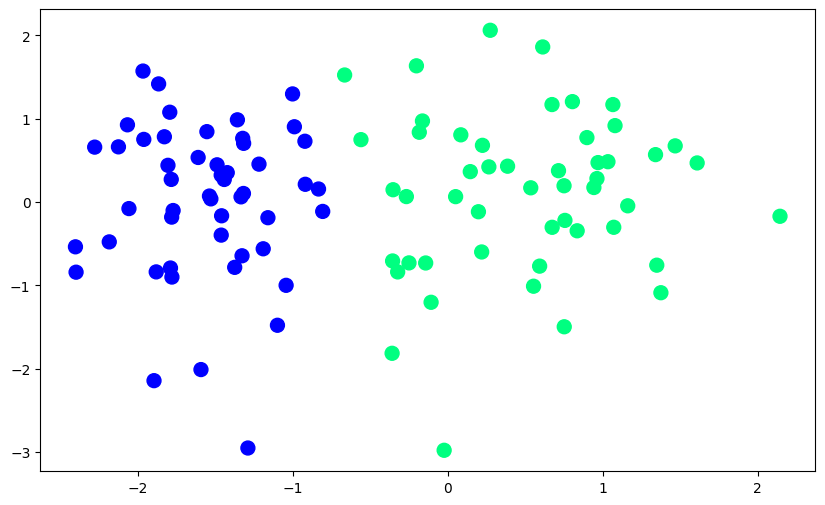

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
def Perceptron(X,y):
    X = np.insert(X,0,1,axis=1) # add 1 in X in the front column
    weights = np.ones(X.shape[1]) # create weight vector of shape X ie [1,1,1]
    lr = 0.1 # learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100) # pick one random value of X from 100
        y_hat = step(np.dot(X[j],weights)) # dot product of the picked value from X[j] have 3 columns and weights [1,1,1]. then step function to give either 0 or 1.
        weights = weights + lr*(y[j]-y_hat)*X[j] # upadte rule of weights
        
    return weights[0],weights[1:]

In [11]:
# let us take 43 row and take the dot product and check the y predict
print(np.dot(np.insert(X[41],0,1),[1,1,1]))

0.2946000908036749


In [12]:
# now we are applying step function for binary output values either 1 or 0.
def step(z):
    return 1 if z>0 else 0

In [13]:
step(0.2946000908036749)

1

In [15]:
intercept_,coef_ = Perceptron(X,y)

In [16]:
print(coef_)
print(intercept_)

[1.4413351  0.08028464]
1.0


In [17]:
# we have Ax+By+C=0 to draw a line we need y=mx+b
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

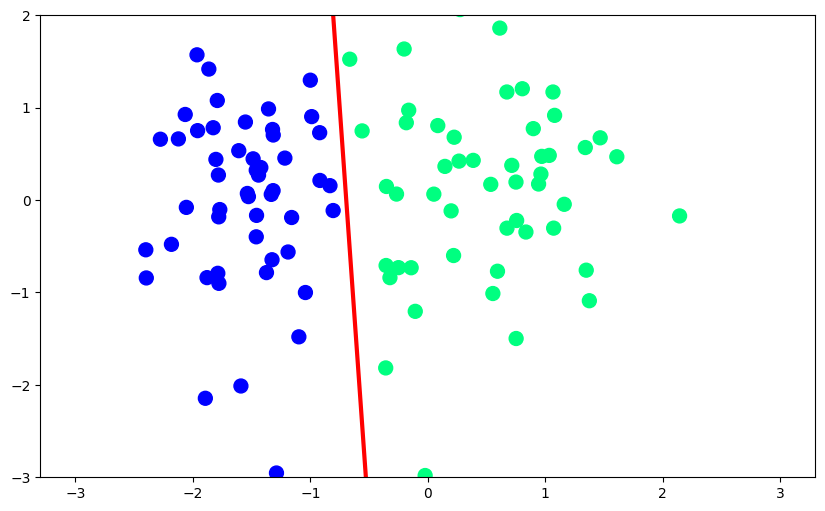

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)